In [114]:
from __future__ import print_function
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

sys.path.insert(0, '../')
import CalCoast_params as Cparams
import CalCoast_map as Cmap
#import CalCoast_tools as tools

from pyspec import spectrum as spec
reload(spec)

<module 'pyspec.spectrum' from '/Users/crocha/Dropbox/research/pyspec/pyspec/spectrum.pyc'>

In [115]:
llc4320map = Cmap.map()

In [116]:
xg_subregion = np.hstack([-130.,-123,-123,-130,-130])
yg_subregion = np.hstack([30.5,30.5,37.5,37.5,30.5])

xg_subregion, yg_subregion = llc4320map.m(xg_subregion,yg_subregion)

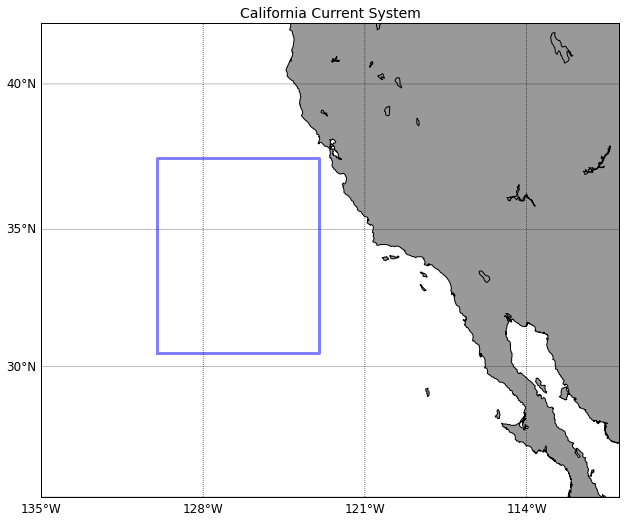

In [117]:
fig = plt.figure(facecolor='w', figsize=(12.,8.5))

llc4320map.m.fillcontinents(color='.60',lake_color='none')
llc4320map.draw_par_mer()
llc4320map.m.drawcoastlines()

#llc4320map.m.plot(xg_region,yg_region,'m',linewidth=3.,alpha=.5)
llc4320map.m.plot(xg_subregion,yg_subregion,'b',linewidth=3.,alpha=.5)

plt.title('California Current System')

# Onedimensional spectra

In [118]:
spec_lons = np.load('eta_wavenumber_lons.npz')
spec_lats = np.load('eta_wavenumber_lats.npz')

spec_lons.keys()

['k', 'Eeta', 'Eetad', 'd']

In [161]:
def set_spec_axis(var='eta',dir='zonal'):
    plt.xlabel(dir+' wavenumber [cpkm]')
    if var == 'eta':
        plt.ylabel(r'SSH variance density [m$^2$/cpkm]')                
        plt.xlim(1.e-3,1./6.)
        plt.ylim(1.e-9,1.e0)
    elif var == 'ke':
        plt.ylabel(r'KE spectral density [m$^2$/cpkm]')    
        plt.xlim(1.e-3,1./6.)
        plt.ylim(1.e-6,1.e0)
    
def plt_spec_slopes(kmin=1./500,kmax=1./10,power=-11/3.,
                    scaling=1.e-12,xtext=1./200.,ytext=1./10.,text=r'-11/3'):
    
    k = np.array([kmin,kmax])
    plt.loglog(k,scaling*(k**power),'k--',linewidth=2.)
    plt.text(xtext,ytext,text,fontsize=14)
    

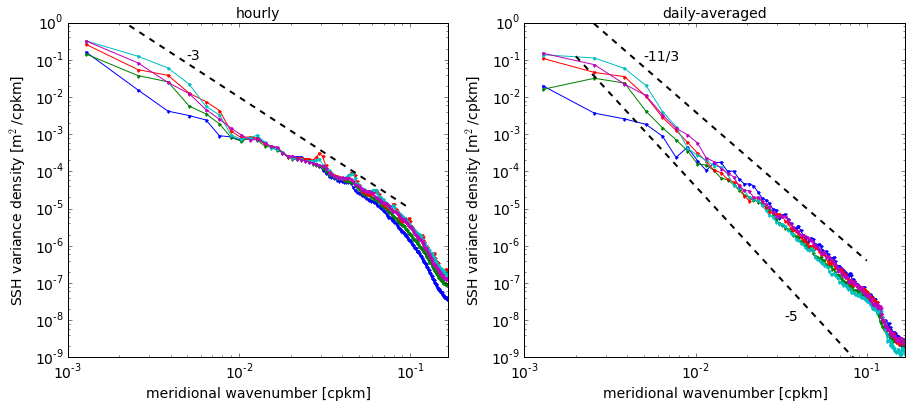

In [148]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plt.loglog(spec_lons['k'],spec_lons['Eeta'][:,:],'.-')

plt.legend(loc=3)

set_spec_axis(dir='meridional')
plt_spec_slopes(power=-3,scaling=1.e-8,text='-3')
plt.title('hourly')

plt.subplot(122)
plt.loglog(spec_lons['k'],spec_lons['Eetad'][:,:,0],'.-')
set_spec_axis(dir='meridional')
plt_spec_slopes(power=-11/3,scaling=.4e-10,text='-11/3')
plt_spec_slopes(power=-5.,scaling=4.e-15,xtext=1./30,ytext=1.e-8,text='-5')
plt.title('daily-averaged')

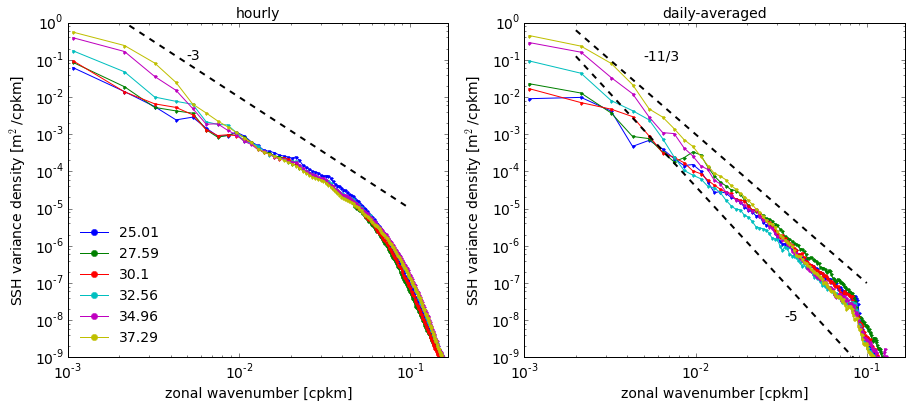

In [149]:
plt.figure(figsize=(15,6))


plt.subplot(121)

for i in range(spec_lats['lat'].size-1):
    plt.loglog(spec_lats['k'],spec_lats['Eeta'][i,:].T,'.-',label=str(np.round(spec_lats['lat'][i]*100)/100))
    
    
plt.legend(loc=3)
set_spec_axis()
plt_spec_slopes(power=-3,scaling=1.e-8,text='-3')
plt.title('hourly')


plt.subplot(122)
plt.loglog(spec_lats['k'],spec_lats['Eetad'][:-1,:,0].T,'.-')
set_spec_axis()
plt_spec_slopes(power=-11/3,scaling=1.e-11,text='-11/3')
plt_spec_slopes(power=-5.,scaling=4.e-15,xtext=1./30,ytext=1.e-8,text='-5')
plt.title('daily-averaged')

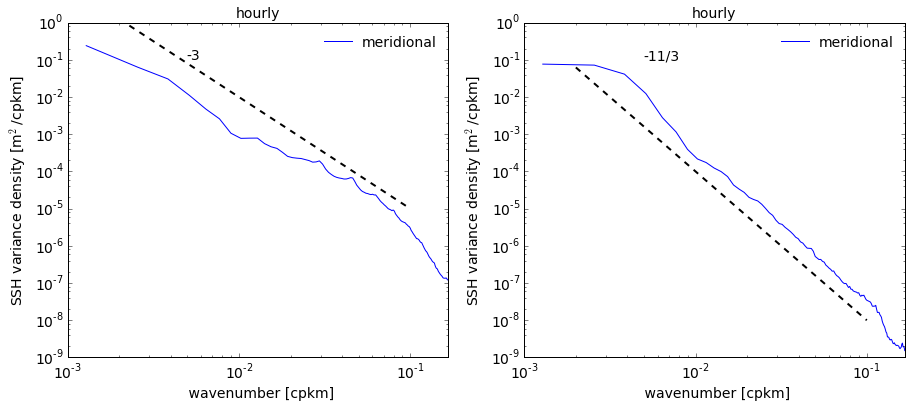

In [150]:
plt.figure(figsize=(15,6))

plt.subplot(121)
#plt.loglog(spec_lats['k'],spec_lats['Eeta'][:,:].mean(axis=0),label='zonal')
plt.loglog(spec_lons['k'],spec_lons['Eeta'][:,:].mean(axis=1),label='meridional')
set_spec_axis(dir='')
plt_spec_slopes(power=-3,scaling=1.e-8,text='-3')
plt.title('hourly')
plt.legend()

plt.subplot(122)
#plt.loglog(spec_lats['k'],spec_lats['Eetad'][::2,:].mean(axis=0),label='zonal')
plt.loglog(spec_lons['k'],spec_lons['Eetad'][:,1::2].mean(axis=1),label='meridional')
set_spec_axis(dir='')
plt_spec_slopes(power=-11/3,scaling=1.e-12,text='-11/3')
plt.title('hourly')
plt.legend()

#  KE spectra

In [151]:
kespec_lats = np.load('uv_wavenumber_lats.npz')

In [152]:
kespec_lats.keys()

['d', 'lon', 'Eud', 'k', 'Evd', 'lat', 'Eu', 'Ev']

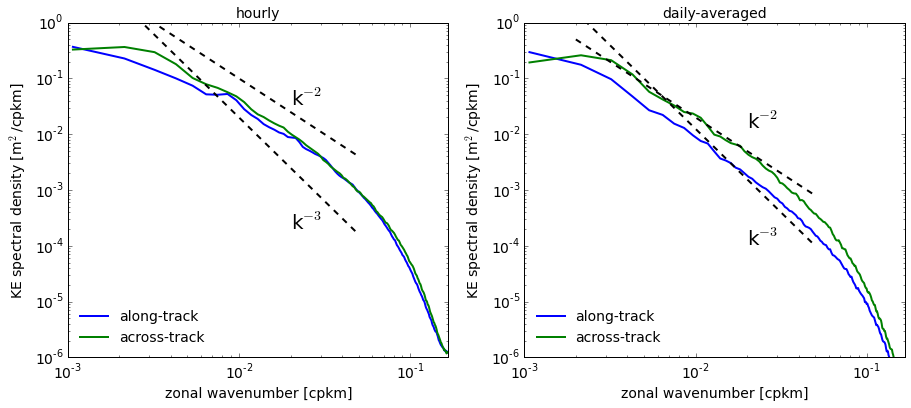

In [191]:
kr = np.array([1./500,1./20])

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.loglog(kespec_lats['k'],kespec_lats['Eu'][:,:].mean(axis=0),
          label='along-track',linewidth=2)
plt.loglog(kespec_lats['k'],kespec_lats['Ev'][:,:].mean(axis=0),
          label='across-track',linewidth=2)
plt.loglog(kr,kr**-2/1.e5,'k--',linewidth=2)
plt.loglog(kr,kr**-3/5.e7,'k--',linewidth=2)
plt.text(1./50,1./30,r'k$^{-2}$',fontsize=20)
plt.text(1./50,2.e-4,r'k$^{-3}$',fontsize=20)
set_spec_axis(var='ke')
plt.legend(loc=3)
plt.title('hourly')

plt.subplot(122)
plt.loglog(kespec_lats['k'],kespec_lats['Eud'][:,:].mean(axis=0),
          label='along-track',linewidth=2)
plt.loglog(kespec_lats['k'],kespec_lats['Evd'][:,:].mean(axis=0),
          label='across-track',linewidth=2)
plt.loglog(kr,kr**-2/5.e5,'k--',linewidth=2)
plt.loglog(kr,kr**-3/.8e8,'k--',linewidth=2)
plt.text(1./50,1./80,r'k$^{-2}$',fontsize=20)
plt.text(1./50,1.e-4,r'k$^{-3}$',fontsize=20)
set_spec_axis(var='ke')
plt.legend(loc=3)
plt.title('daily-averaged')